In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

        EDA (EXPLOARATORY DATA ANALYSIS)

        * Shallow analysis :

-- Target variable : Churn
-- number of individuals and columns : (7043, 20) when we get rid of column 'customerID'
-- Variables type : 4 quantitatives var and 16 qualitatives var
-- missing values : column TotalCharge is the only one with missing values. The number of missing for this column is quite small among the total individuals we have. 

	* Deep analysis :

-- target variable visualization : there are more customers who are actually remaining with the company than those who are churning
-- Getting to know the dataset :
        * Gender 
This variable stand for the customer's gender : Male or Female. By visualizing it we found that there are almost more male than female. Male = 3555, Female = 3488.
        * SeniorCitizen
This var Indicates if the customer is 65 or older : 1 or 0. 1 if it is older and 0 if not. actually most of the customers are less than 65. 0 = 5901, 1 = 1142.
        * Partner
This Indicates if the customer is married: Yes or No. there are almost more non married customers than married customers.
Married = 3402, Non Married = 3641
        * Dependents
Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. About 70% of customers are living with no dependents.
        * PhoneService
Indicates if the customer subscribes to home phone service with the company: Yes, No. There are almost no customer who haven't subscribed to home phone service.
        * MultipleLines
Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No. For those who have subscribed to home phone service most of them have almost one phone line unlike those who have multiple.
        * InternetService
Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic. About 3096 are using 'fiber optic' 2421 are using 'DSL' and about 1526 don't subscribe to internet service.
        * OnlineSecurity
Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No. For those who have internet service most have not signed up for additional online security.
        * OnlineBackup
Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No. For those who have internet service most have not signed up for onlinebackup.
        * DeviceProtection
Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No. For those who have internet service most of them didn't subscribe to deviceprotection.
        * TechSupport
Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No. 
For those who have internet service, most have not signed up for device protection.
        * Contract
Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. The most used contract type is 'Month-to-Month' contract. over 55% of customers have signed it.

In [2]:
churn_data = pd.read_csv("dataset.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_data.shape

(7043, 21)

In [5]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Based on the type of MonthlyCharges the TotalCharges can't be different. So that the following code is dealing with that.

In [4]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')
churn_data.shape

(7043, 21)

column TotalCharge is the only one with missing values. The number of missing for this column is quite small among the total individuals we have.

In [5]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The following code help us get insight from categorical variables

In [6]:
qualitative_variables = churn_data.select_dtypes(include="object").columns
qualitative_variables = qualitative_variables.drop("customerID")
qualitative_variables

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [9]:
def univariate_analysis_for_qualitative_variable(value):
    print(f"------------------------------{value}---------------------------")
    print(churn_data[f"{value}"].value_counts())
    print("-----------------------------------------------------------------")

In [10]:
for value in qualitative_variables:
    univariate_analysis_for_qualitative_variable(value)

------------------------------gender---------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------------------------------------------
------------------------------Partner---------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------------------------------------------
------------------------------Dependents---------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------------------------------------------
------------------------------PhoneService---------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------------------------------------------
------------------------------MultipleLines---------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------------------------------------------
--

        * tenure
Indicates the total amount of months that the customer has been with the company. more than 1000 customers are new in the company. they have like less than 5 months of being customer. about 800 customers are with the company it's been more than 65 months. The average value of being with the company is 32 months.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

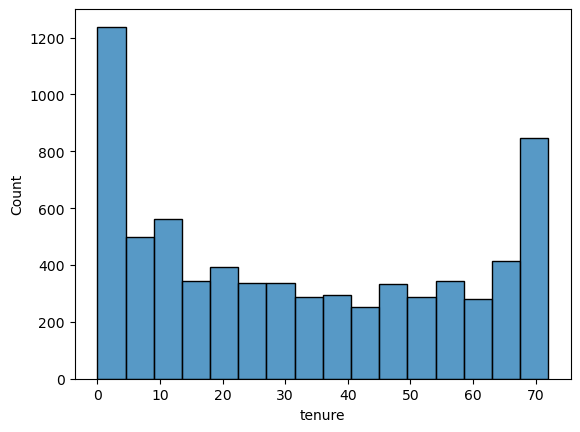

In [21]:
sns.histplot(churn_data.tenure)

In [14]:
churn_data.tenure.mean()

32.37114865824223

    * MonthlyCharges
Indicates the customer’s current total monthly charge for all their services from the company. On average, a given customer is charged 63 euros regardless of the type of contract. 

In [16]:
churn_data.groupby("Contract")["MonthlyCharges"].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

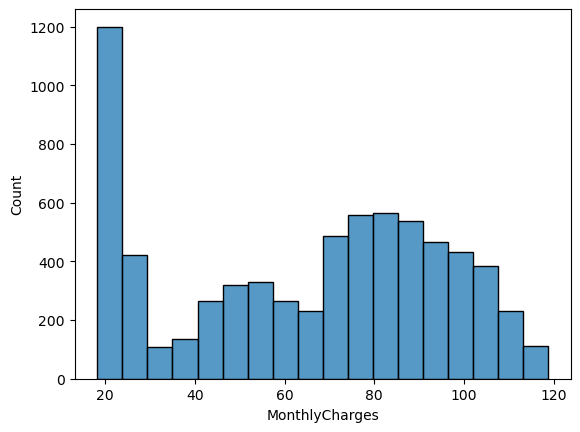

In [22]:
sns.histplot(churn_data.MonthlyCharges)

    * TotalCharges
Indicates the customer’s total charges. For those with lower charge their total charge is lower than those with higher charge.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

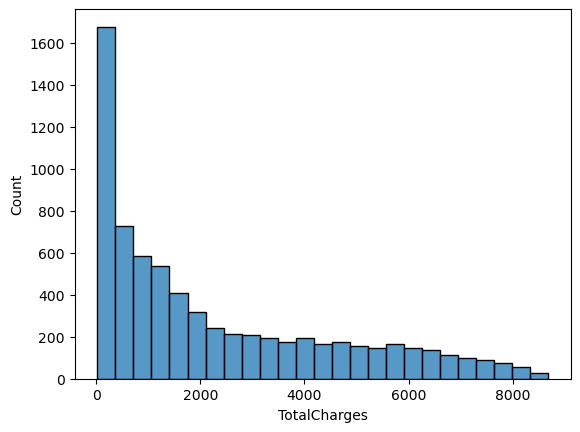

In [23]:
sns.histplot(churn_data.TotalCharges)